# *QVI*

the purpose of this notebook is to perform a retail strategy and analytics analysis by comparing the performance of different stores based on sales metrics.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("QVI_data.csv")

In [3]:
data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [4]:
data.shape

(264834, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [6]:
# check for null values
data.isnull().sum()

,0
LYLTY_CARD_NBR,0
DATE,0
STORE_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0
PACK_SIZE,0
BRAND,0


In [7]:
# check for duplicates
data.duplicated().sum()

1

In [8]:
# display the row duplicated
data[data.duplicated()]

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
106249,107024,2018-10-01,107,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,175,SMITHS,OLDER SINGLES/COUPLES,Premium


In [9]:
# delete the duplicated
data.drop_duplicates(inplace=True)

In [10]:
# check for duplicates
data.duplicated().sum()

0

## Total Sales Revenue

In [11]:
total_sales = sum(data['TOT_SALES'])
print("The Total Sales Revenue is:",round(total_sales,2))

The Total Sales Revenue is: 1933109.0


## Total Number of Customers

In [12]:
total_customers = len(data['LYLTY_CARD_NBR'].unique())
print("Total Number of Customers :",total_customers)

Total Number of Customers : 72636


## Average Number of Transactions Per Customer

In [13]:
avg_tran_per_cust = round(data.shape[0] / total_customers,2)
print('Average Number of Transactions Per Customer :', avg_tran_per_cust)

Average Number of Transactions Per Customer : 3.65


In [14]:
data['YEARMONTH'] = [''.join(x.split('-')[0:2]) for x in data.DATE]
data['YEARMONTH'] = pd.to_numeric(data['YEARMONTH'])
data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEARMONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,201810
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,201809
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,201903
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,201903
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,201811


## Monthly Sales of Each Store

*  Monthly overall sales revenue
*  Monthly number of customers
* Monthly number of transactions per customer

In [15]:
metrics = data.groupby(['STORE_NBR', 'YEARMONTH']).agg({
    'TOT_SALES': 'sum',            # Sum of total sales per store and month
    'LYLTY_CARD_NBR': 'nunique',   # Count of unique loyalty card numbers (customers)
    'TXN_ID': 'nunique',           # Count of unique transactions
    'PROD_QTY': 'sum'              # Sum of product quantities sold
})
# Calculates the average price per unit sold
metrics['PRICE_PER_UNIT']=metrics['TOT_SALES']/metrics['PROD_QTY']
# Calculates the average product quantity per transaction
metrics['CHIP_PER_TXN']=metrics['PROD_QTY']/metrics['TXN_ID']
# Renaming Column
metrics=metrics.rename(columns={'LYLTY_CARD_NBR':'CUSTOMERS'})
# Calculating Transactions Per Customer
metrics['TXN_PER_CUST']=metrics['TXN_ID']/metrics['CUSTOMERS']
# Dropping Column
metrics.drop(['TXN_ID'],axis=1,inplace=True)

In [16]:
full=metrics.copy()

In [17]:
#Extract data for February 2019 through April 2019 into a new DataFrame called trial.
trial=[]
for i in metrics.index:
    if(i[1]>=201902):
        if(i[1]<=201904):
            trial.append(metrics.loc[i])
        metrics.drop(i,inplace=True)
trial=pd.DataFrame(trial)

In [18]:
#rename index name
trial.index.name=('IDX')
k=0
# add two new columns
trial['STORE_NBR']=0
trial['MONTHYEAR']=0
#loop over the trial.index and assign values to the new columns
for (i,j) in trial.index:
    trial['STORE_NBR'].iloc[k]=i
    trial['MONTHYEAR'].iloc[k]=j
    k=k+1
# Reset the index to STORE_NBR and MONTHYEAR
trial=trial.set_index(['STORE_NBR','MONTHYEAR'])

In [19]:
trial

TOT_SALES  CUSTOMERS  PROD_QTY  PRICE_PER_UNIT  \
STORE_NBR MONTHYEAR                                                   
1         201902         225.4       52.0      65.0        3.467692   
          201903         192.9       45.0      58.0        3.325862   
          201904         192.9       42.0      57.0        3.384211   
2         201902         139.4       29.0      37.0        3.767568   
          201903         192.1       43.0      51.0        3.766667   
...                        ...        ...       ...             ...   
271       201903         735.8       79.0     202.0        3.642574   
          201904         774.6       87.0     218.0        3.553211   
272       201902         395.5       45.0      91.0        4.346154   
          201903         442.3       50.0     101.0        4.379208   
          201904         445.1       54.0     105.0        4.239048   

                     CHIP_PER_TXN  TXN_PER_CUST  
STORE_NBR MONTHYEAR                              
1         201902         1.181818      1.057692  
          201903         1.183673      1.088889  
          201904         1.325581      1.023810  
2         201902         1.156250      1.103448  
          201903         1.108696      1.069767  
...                           ...           ...  
271       201903         2.000000      1.278481  
          201904         2.000000      1.252874  
272       201902         1.895833      1.066667  
          201903         1.905660      1.060000  
          201904         1.909091      1.018519  

[794 rows x 6 columns]

In [20]:
metrics

TOT_SALES  CUSTOMERS  PROD_QTY  PRICE_PER_UNIT  \
STORE_NBR YEARMONTH                                                   
1         201807         206.9         49        62        3.337097   
          201808         176.1         42        54        3.261111   
          201809         278.8         59        75        3.717333   
          201810         188.1         44        58        3.243103   
          201811         192.6         46        57        3.378947   
...                        ...        ...       ...             ...   
272       201809         304.7         32        71        4.291549   
          201810         430.6         44        99        4.349495   
          201811         376.2         41        87        4.324138   
          201812         403.9         47        89        4.538202   
          201901         423.0         46        96        4.406250   

                     CHIP_PER_TXN  TXN_PER_CUST  
STORE_NBR YEARMONTH                              
1         201807         1.192308      1.061224  
          201808         1.255814      1.023810  
          201809         1.209677      1.050847  
          201810         1.288889      1.022727  
          201811         1.212766      1.021739  
...                           ...           ...  
272       201809         1.972222      1.125000  
          201810         1.980000      1.136364  
          201811         1.933333      1.097561  
          201812         1.893617      1.000000  
          201901         1.920000      1.086957  

[1848 rows x 6 columns]

## find correlation and magnitude of any store wih another store

In [21]:
def calcCorr(store):
    '''
    computes the correlation between a specific store's metrics
    and the metrics of other stores.
    '''
    a=[]
    metrix=metrics[['TOT_SALES','CUSTOMERS']]
    # Loop through the metrix DataFrame by store:
    for i in metrix.index:
        a.append(metrix.loc[store].corrwith(metrix.loc[i[0]]))
    df= pd.DataFrame(a)
    df.index=metrix.index
    df=df.drop_duplicates()
    df.index=[s[0] for s in df.index]
    df.index.name="STORE_NBR"
    return df

In [22]:
def standardizer(df):
    # take absolute values of the DataFrame:
    df=df.abs()
    # Calculate the row-wise mean and store it in a new column
    df['MAGNITUDE']=df.mean(axis=1)
    return df

## Store 77

In [23]:
corr77=calcCorr(77)

In [24]:
corr77.head(3)

,TOT_SALES,CUSTOMERS
STORE_NBR,,
1,0.075218,0.322168
2,-0.263079,-0.572051
3,0.806644,0.834207


In [25]:
corr77=standardizer(corr77)
corr77

,TOT_SALES,CUSTOMERS,MAGNITUDE
STORE_NBR,,,
1,0.075218,0.322168,0.198693
2,0.263079,0.572051,0.417565
3,0.806644,0.834207,0.820426
4,0.263300,0.295639,0.279469
5,0.110652,0.370659,0.240655
...,...,...,...
268,0.344757,0.369517,0.357137
269,0.315730,0.474293,0.395011
270,0.315430,0.131259,0.223345


In [26]:
corr77=corr77.sort_values(['MAGNITUDE'],ascending=False).dropna()
corr77

,TOT_SALES,CUSTOMERS,MAGNITUDE
STORE_NBR,,,
77,1.000000,1.000000,1.000000
233,0.903774,0.990358,0.947066
119,0.867664,0.983267,0.925466
71,0.914106,0.754817,0.834461
3,0.806644,0.834207,0.820426
...,...,...,...
256,0.014245,0.047863,0.031054
159,0.001655,0.054404,0.028030
260,0.016618,0.027446,0.022032


233 is the control store as it has max corr


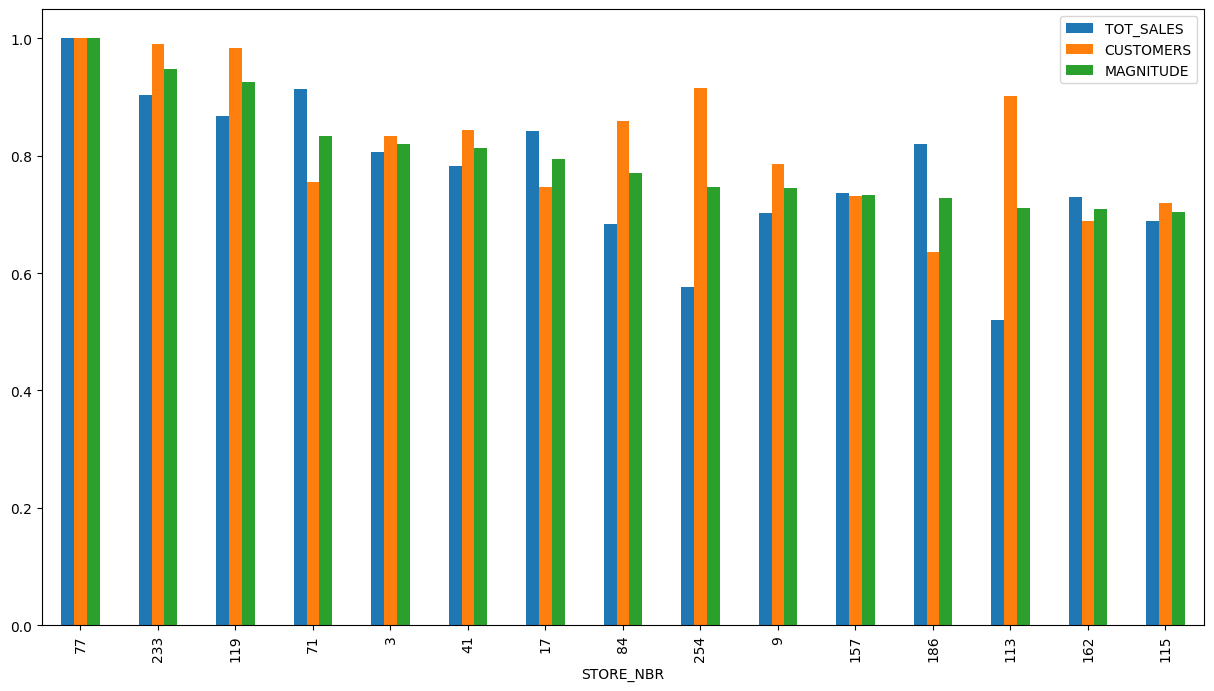

In [27]:
#Taking 0.7 as threshold corelation
corr77[(corr77.MAGNITUDE.abs()>0.7)].plot(kind='bar',figsize=(15,8))
plt.show()

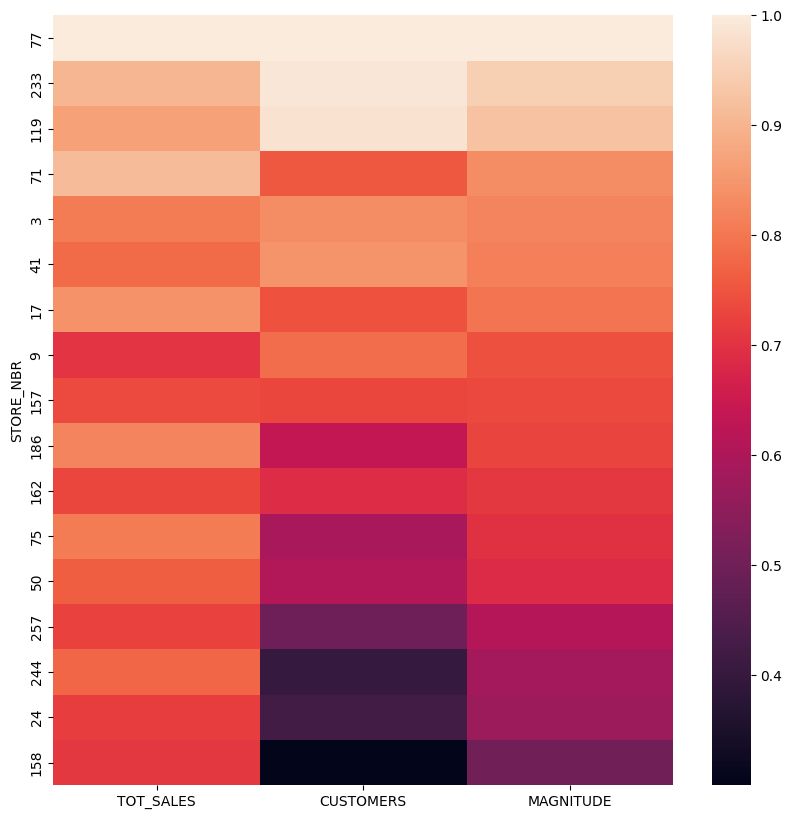

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(corr77[corr77.TOT_SALES.abs()>0.7])
plt.show()

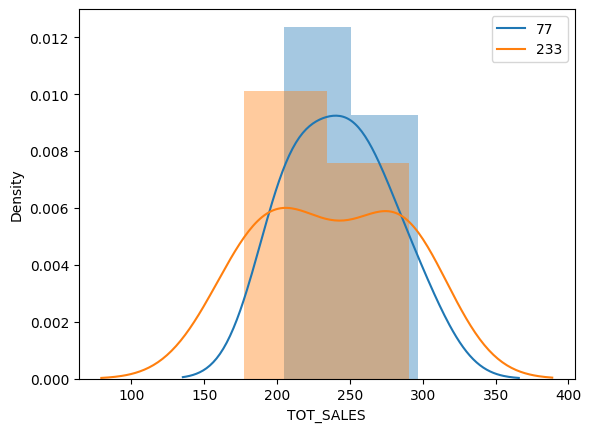

In [29]:
sns.distplot(metrics.loc[77]['TOT_SALES'])
sns.distplot(metrics.loc[233]['TOT_SALES'])
plt.legend(labels=['77','233'])
plt.show()

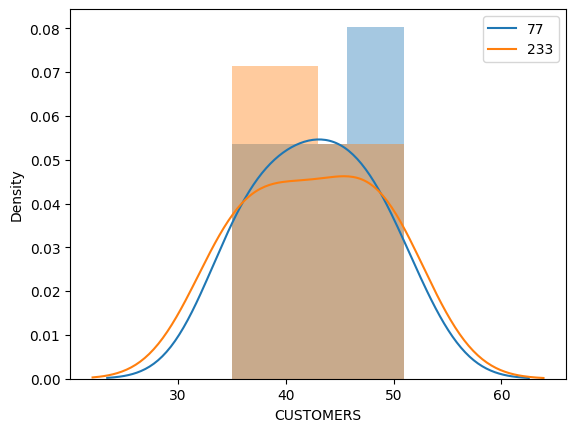

In [30]:
sns.distplot(metrics.loc[77]['CUSTOMERS'])
sns.distplot(metrics.loc[233]['CUSTOMERS'])
plt.legend(labels=['77','233'])
plt.show()

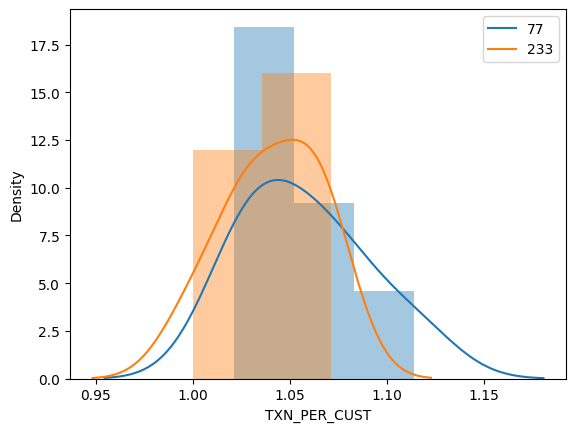

In [31]:
sns.distplot(metrics.loc[77]['TXN_PER_CUST'])
sns.distplot(metrics.loc[233]['TXN_PER_CUST'])
plt.legend(labels=['77','233'])
plt.show()

<br>
Calculating difference between scaled control sales and trial sales.<br>
Let null hypothesis be that both stores 77 and 233 have no difference.

In [32]:
from scipy.stats import ks_2samp,ttest_ind,t

the KS statistic (which measures the maximum difference between the cumulative distributions) and the p-value (which indicates the likelihood that the observed difference is due to random chance).

In [33]:
# difference between control and trial sales
a=[]
for x in metrics.columns:
    a.append(ks_2samp(metrics.loc[77][x], metrics.loc[233][x]))
a=pd.DataFrame(a,index=metrics.columns)

In [34]:
a

,statistic,pvalue
TOT_SALES,0.285714,0.962704
CUSTOMERS,0.142857,0.999961
PROD_QTY,0.285714,0.962704
PRICE_PER_UNIT,0.285714,0.962704
CHIP_PER_TXN,0.285714,0.962704
TXN_PER_CUST,0.428571,0.575175


None of the metrics show statistically significant differences. we can't reject the null hypothesis

### Assessment of trial

In [35]:
b=[]
for x in trial.columns:
    b.append(ttest_ind(trial.loc[77][x].tail(2), trial.loc[233][x].tail(2)))
b=pd.DataFrame(b,index=metrics.columns)

In [36]:
b

,statistic,pvalue
TOT_SALES,4.267336,0.050769
CUSTOMERS,2.586131,0.122618
PROD_QTY,4.043680,0.056063
PRICE_PER_UNIT,-0.634173,0.590828
CHIP_PER_TXN,1.785126,0.216165
TXN_PER_CUST,0.332434,0.771171


In [37]:
#critical value
t.ppf(0.95,df=7)

1.894578605061305

Since all of the p-values are high (say more than 0.05), we cannot reject the null hypothesis

### Visualizings means

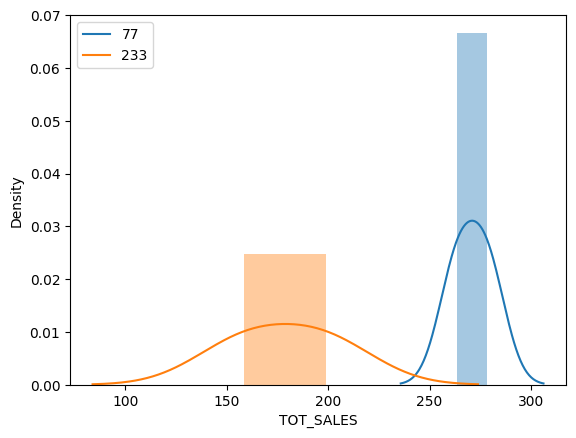

In [38]:
sns.distplot(trial.loc[77]['TOT_SALES'].tail(2))
sns.distplot(trial.loc[233]['TOT_SALES'].tail(2))
plt.legend(labels=['77','233'])
plt.show()

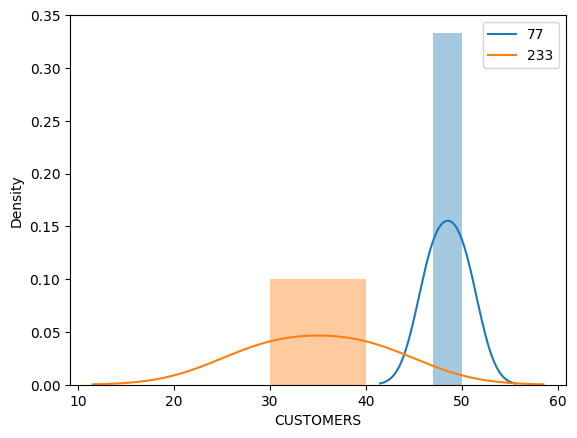

In [39]:
sns.distplot(trial.loc[77]['CUSTOMERS'].tail(2))
sns.distplot(trial.loc[233]['CUSTOMERS'].tail(2))
plt.legend(labels=['77','233'])
plt.show()

there is a significant difference in the means, so trial store behavior(77) is different from control store (233).

## Store 86

In [40]:
corr86=calcCorr(86)

In [41]:
corr86.head(3)

,TOT_SALES,CUSTOMERS
STORE_NBR,,
1,0.445632,0.485831
2,-0.403835,-0.086161
3,-0.261284,-0.353786


In [42]:
corr86=standardizer(corr86)
corr86

,TOT_SALES,CUSTOMERS,MAGNITUDE
STORE_NBR,,,
1,0.445632,0.485831,0.465731
2,0.403835,0.086161,0.244998
3,0.261284,0.353786,0.307535
4,0.039035,0.169608,0.104322
5,0.235159,0.253229,0.244194
...,...,...,...
268,0.452182,0.034273,0.243228
269,0.697055,0.098587,0.397821
270,0.730679,0.767267,0.748973


In [43]:
corr86=corr86.sort_values(['MAGNITUDE'],ascending=False).dropna()
corr86

,TOT_SALES,CUSTOMERS,MAGNITUDE
STORE_NBR,,,
86,1.000000,1.000000,1.000000
155,0.877882,0.942876,0.910379
23,0.784698,0.943559,0.864128
120,0.872693,0.815097,0.843895
114,0.734415,0.855339,0.794877
...,...,...,...
91,0.019027,0.041271,0.030149
17,0.029793,0.030039,0.029916
131,0.028487,0.031142,0.029815


Above data shows that stores 155 is the most correlated to store 86.

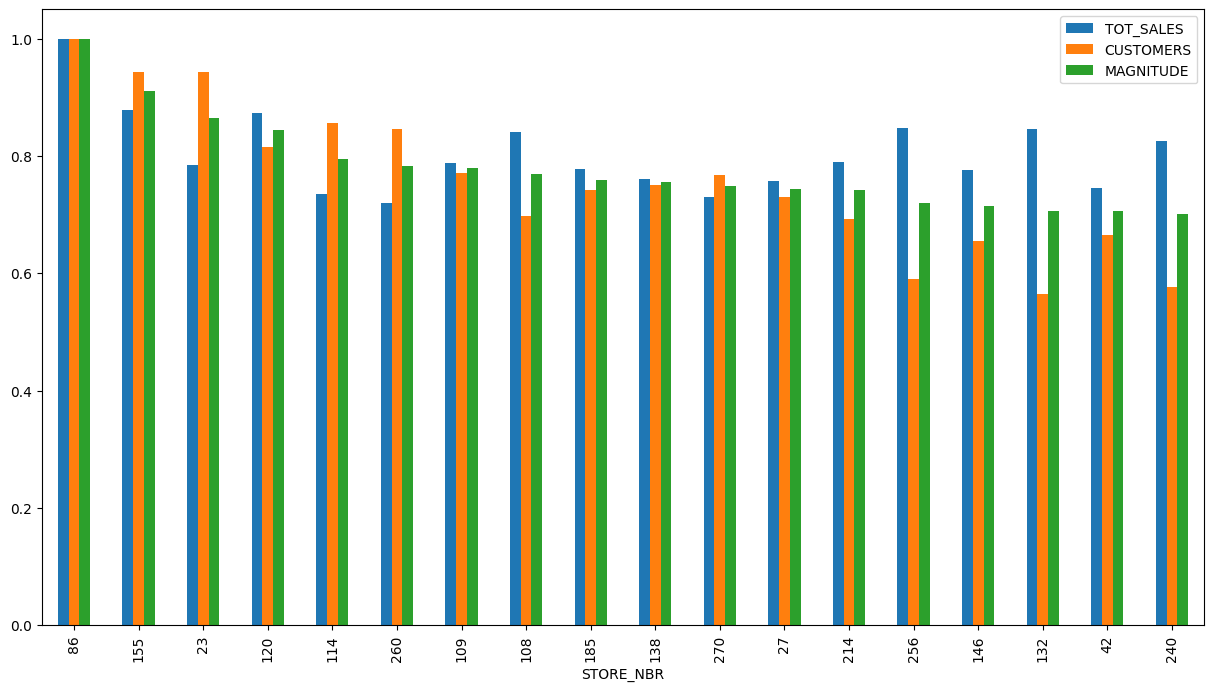

In [44]:
#Taking 0.7 as threshold corelation
corr86[(corr86.MAGNITUDE.abs()>0.7)].plot(kind='bar',figsize=(15,8))
plt.show()

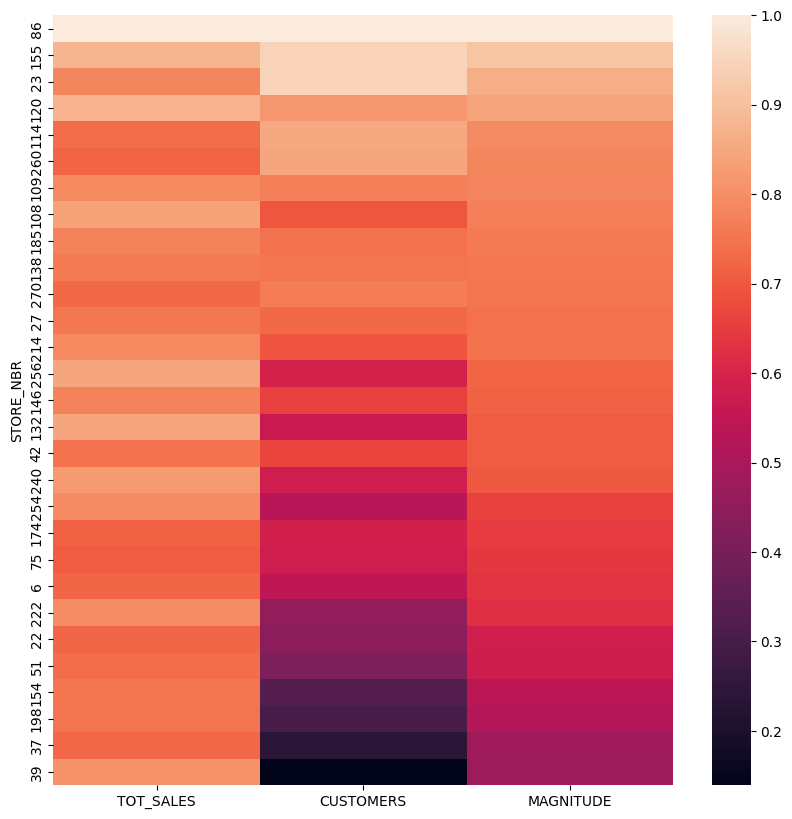

In [45]:
plt.figure(figsize=(10,10))
sns.heatmap(corr86[corr86.TOT_SALES.abs()>0.7])
plt.show()

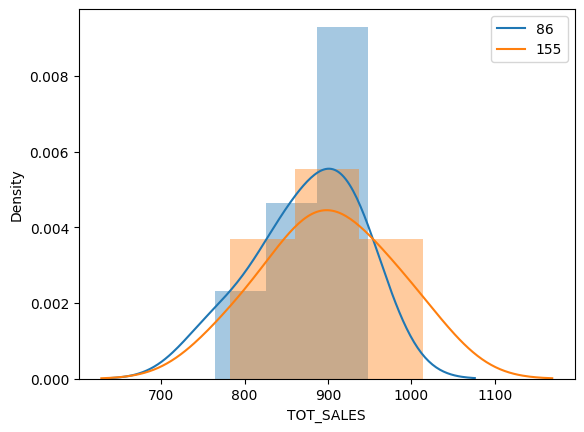

In [46]:
sns.distplot(metrics.loc[86]['TOT_SALES'])
sns.distplot(metrics.loc[155]['TOT_SALES'])
plt.legend(labels=['86','155'])
plt.show()


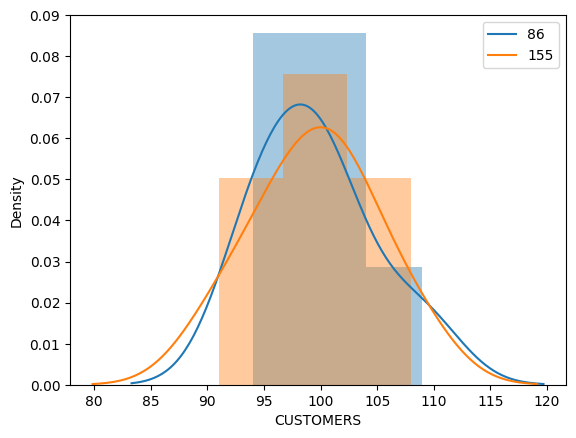

In [47]:
sns.distplot(metrics.loc[86]['CUSTOMERS'])
sns.distplot(metrics.loc[155]['CUSTOMERS'])
plt.legend(labels=['86','155'])
plt.show()

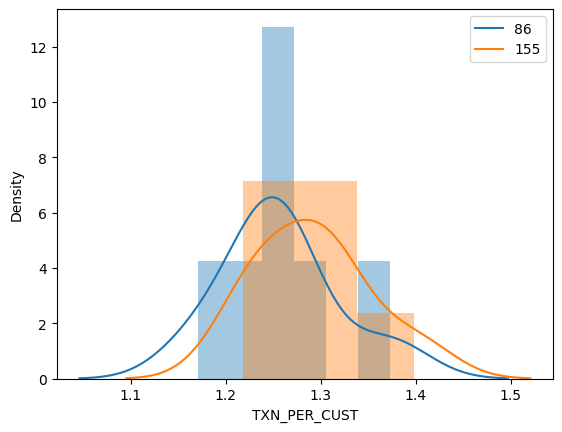

In [48]:
sns.distplot(metrics.loc[86]['TXN_PER_CUST'])
sns.distplot(metrics.loc[155]['TXN_PER_CUST'])
plt.legend(labels=['86','155'])
plt.show()

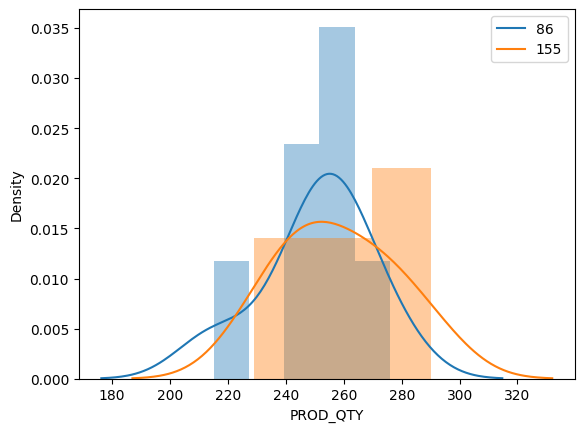

In [49]:
sns.distplot(metrics.loc[86]['PROD_QTY'])
sns.distplot(metrics.loc[155]['PROD_QTY'])
plt.legend(labels=['86','155'])
plt.show()

selecting store 155 as control store with max similarities to store 86.

Calculating difference between scaled control sales and trial sales


In [50]:
# difference between control and trial sales
a=[]
for x in metrics.columns:
    a.append(ks_2samp(metrics.loc[86][x], metrics.loc[155][x]))
a=pd.DataFrame(a,index=metrics.columns)

In [51]:
a

,statistic,pvalue
TOT_SALES,0.285714,0.962704
CUSTOMERS,0.285714,0.962704
PROD_QTY,0.285714,0.962704
PRICE_PER_UNIT,0.428571,0.575175
CHIP_PER_TXN,0.428571,0.575175
TXN_PER_CUST,0.428571,0.575175


#### Assessment of trial

In [52]:
b=[]
for x in trial.columns:
    b.append(ttest_ind(trial.loc[86][x].tail(2), trial.loc[155][x].tail(2)))
b=pd.DataFrame(b,index=metrics.columns)

In [53]:
b

,statistic,pvalue
TOT_SALES,1.234512,0.342378
CUSTOMERS,2.414953,0.137076
PROD_QTY,1.862532,0.203568
PRICE_PER_UNIT,0.366214,0.749316
CHIP_PER_TXN,-0.285938,0.801822
TXN_PER_CUST,-1.074767,0.394929


In [54]:
#critical value
t.ppf(0.95,df=7)

1.894578605061305

### visualizing

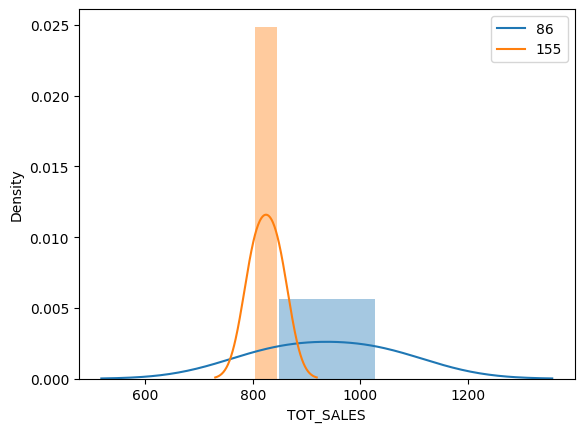

In [55]:
sns.distplot(trial.loc[86]['TOT_SALES'].tail(2))
sns.distplot(trial.loc[155]['TOT_SALES'].tail(2))
plt.legend(labels=['86','155'])
plt.show()

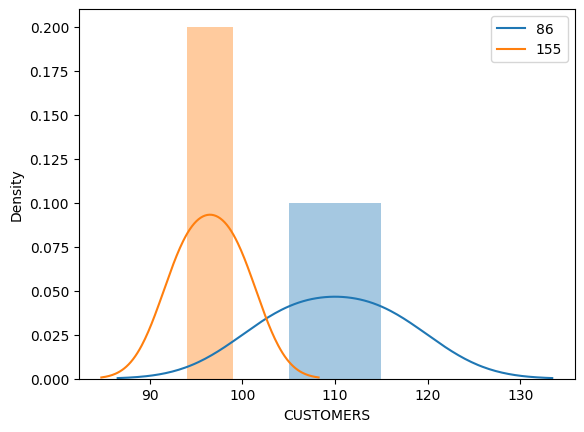

In [56]:
sns.distplot(trial.loc[86]['CUSTOMERS'].tail(2))
sns.distplot(trial.loc[155]['CUSTOMERS'].tail(2))
plt.legend(labels=['86','155'])
plt.show()

 a significant difference in the means, so trial store behavior(86) is different from control store (155)

## Store 88

In [57]:
corr88=calcCorr(88)

In [58]:
corr88.head(3)


,TOT_SALES,CUSTOMERS
STORE_NBR,,
1,0.813636,0.305334
2,-0.067927,-0.452379
3,-0.507847,0.522884


In [59]:
corr88=standardizer(corr88)
corr88

,TOT_SALES,CUSTOMERS,MAGNITUDE
STORE_NBR,,,
1,0.813636,0.305334,0.559485
2,0.067927,0.452379,0.260153
3,0.507847,0.522884,0.515365
4,0.745566,0.361503,0.553534
5,0.190330,0.025320,0.107825
...,...,...,...
268,0.021429,0.672672,0.347050
269,0.172578,0.274781,0.223679
270,0.723272,0.103032,0.413152


In [60]:
corr88=corr88.sort_values(['MAGNITUDE'],ascending=False).dropna()

In [61]:
corr88.head(15)

,TOT_SALES,CUSTOMERS,MAGNITUDE
STORE_NBR,,,
88,1.000000,1.000000,1.000000
178,0.731857,0.939466,0.835661
14,0.698557,0.942976,0.820767
133,0.735407,0.835426,0.785417
204,0.885774,0.550263,0.718018
134,0.864293,0.508880,0.686587
113,0.495763,0.862632,0.679198
253,0.811838,0.500962,0.656400
239,0.642329,0.660672,0.651501


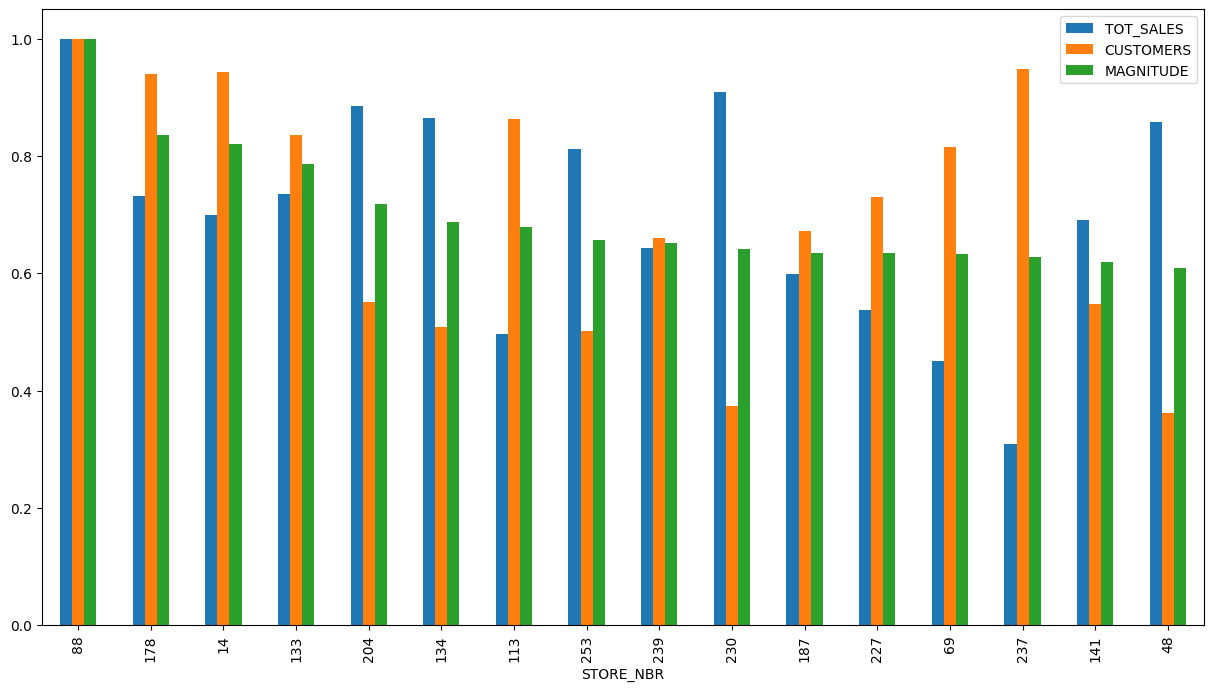

In [62]:
#Taking 0.6 as threshold corelation
corr88[(corr88.MAGNITUDE.abs()>0.6)].plot(kind='bar',figsize=(15,8))
plt.show()

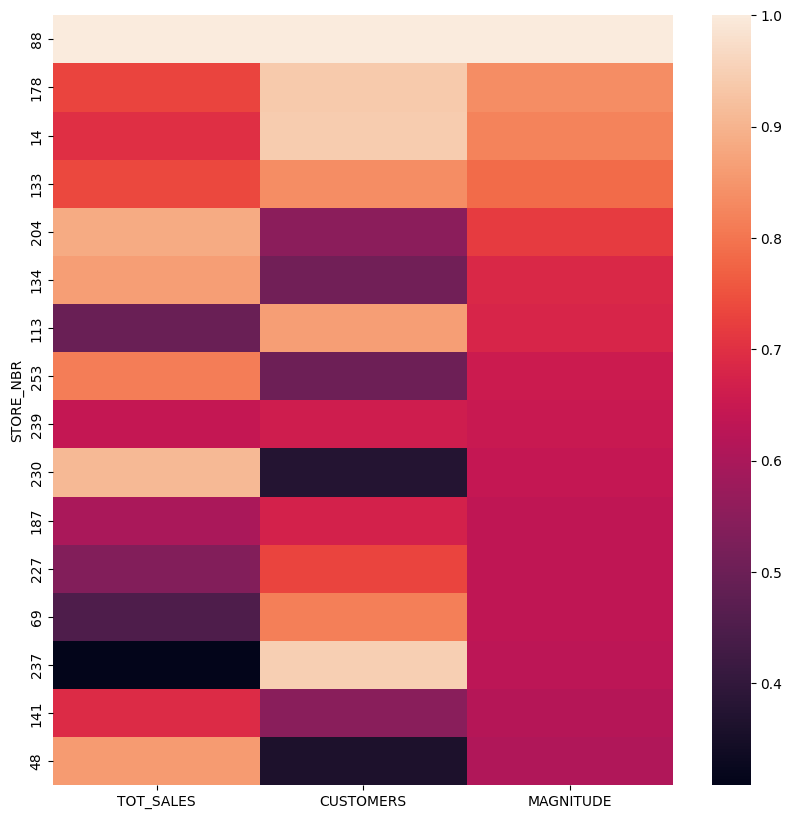

In [63]:
plt.figure(figsize=(10,10))
sns.heatmap(corr88[corr88.MAGNITUDE.abs()>0.6])
plt.show()

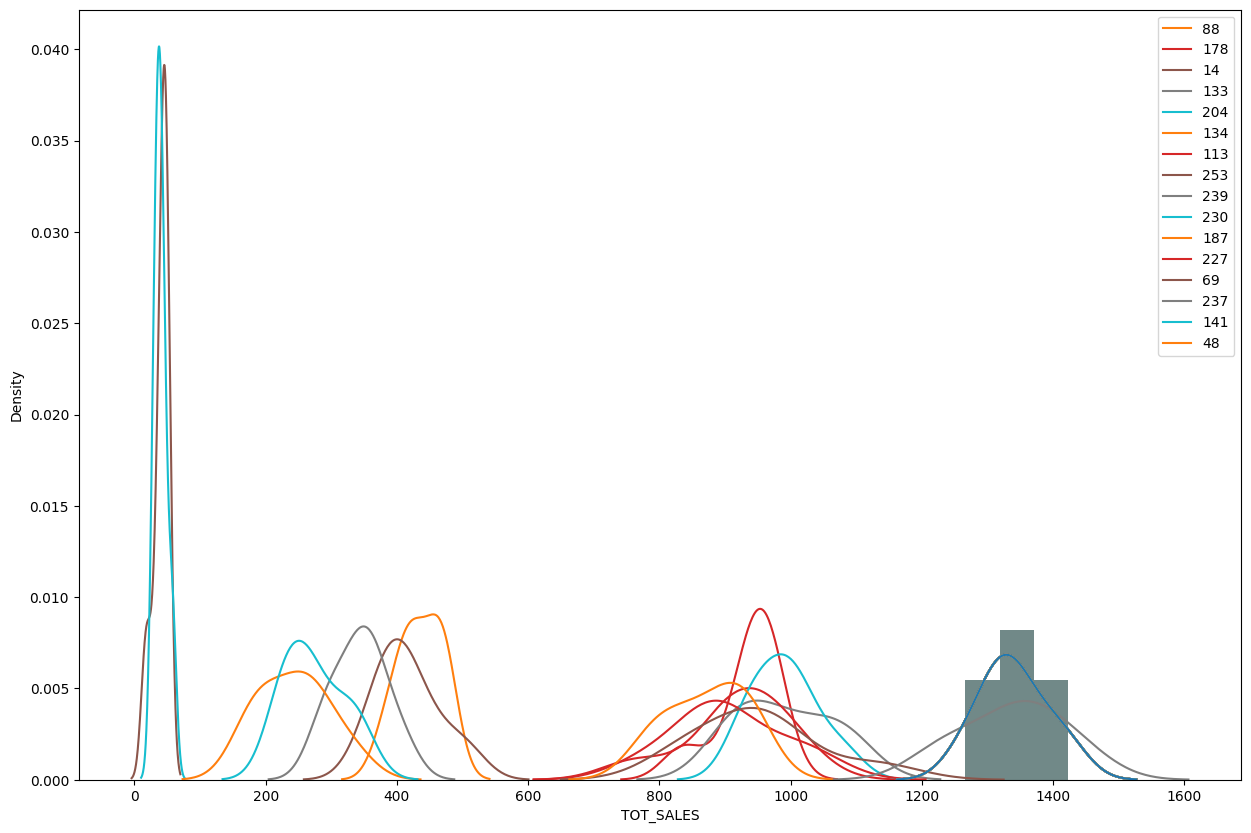

In [64]:
plt.figure(figsize=(15,10))
for x in corr88[corr88.MAGNITUDE.abs()>0.6].index:
    sns.distplot(metrics.loc[88]['TOT_SALES'])
    sns.distplot(metrics.loc[x]['TOT_SALES'],label=x,hist=False)
plt.legend()
plt.show()

#### Therefore Taking the store 237 into consideration plotting different measure against those of store 88

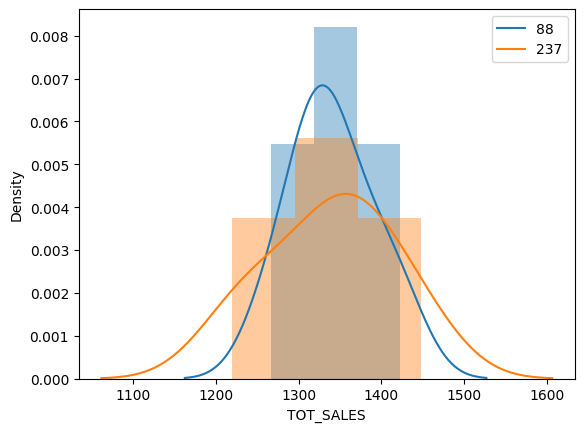

In [65]:
sns.distplot(metrics.loc[88]['TOT_SALES'])
sns.distplot(metrics.loc[237]['TOT_SALES'])
plt.legend(labels=['88','237'])
plt.show()

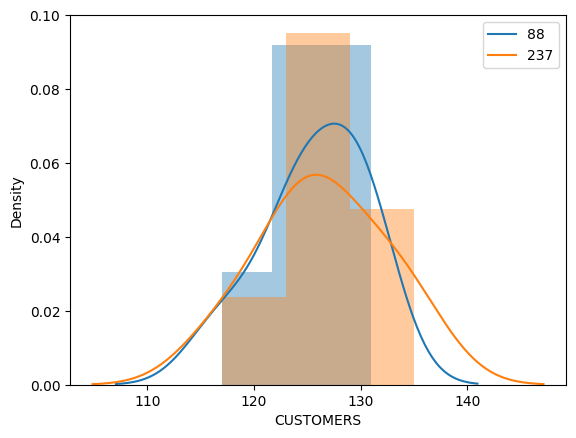

In [66]:
sns.distplot(metrics.loc[88]['CUSTOMERS'])
sns.distplot(metrics.loc[237]['CUSTOMERS'])
plt.legend(labels=['88','237'])
plt.show()

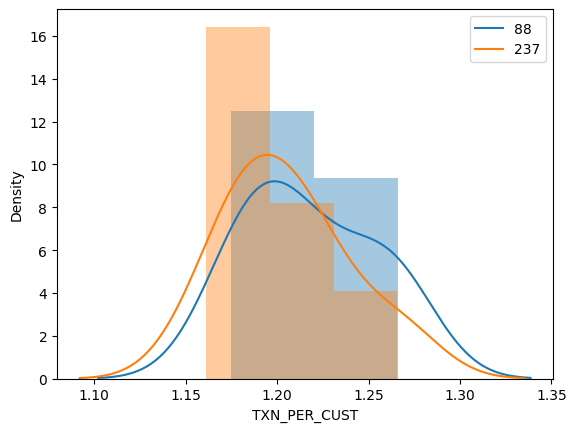

In [67]:
sns.distplot(metrics.loc[88]['TXN_PER_CUST'])
sns.distplot(metrics.loc[237]['TXN_PER_CUST'])
plt.legend(labels=['88','237'])
plt.show()

#### Calculating difference between scaled control sales and trial sales

In [68]:
# difference between control and trial sales
a=[]
for x in metrics.columns:
    a.append(ks_2samp(metrics.loc[88][x], metrics.loc[237][x]))
a=pd.DataFrame(a,index=metrics.columns)

In [69]:
a

,statistic,pvalue
TOT_SALES,0.285714,0.962704
CUSTOMERS,0.285714,0.962704
PROD_QTY,0.285714,0.962704
PRICE_PER_UNIT,0.428571,0.575175
CHIP_PER_TXN,0.571429,0.212121
TXN_PER_CUST,0.285714,0.962704


## Assessment of trial

In [70]:
b=[]
for x in trial.columns:
    b.append(ttest_ind(trial.loc[86][x].tail(2), trial.loc[237][x].tail(2)))
b=pd.DataFrame(b,index=metrics.columns)

In [71]:
b

,statistic,pvalue
TOT_SALES,-3.010587,0.094888
CUSTOMERS,-1.890571,0.199245
PROD_QTY,-0.266076,0.815100
PRICE_PER_UNIT,-6.804115,0.020925
CHIP_PER_TXN,-0.465456,0.687370
TXN_PER_CUST,9.547202,0.010794


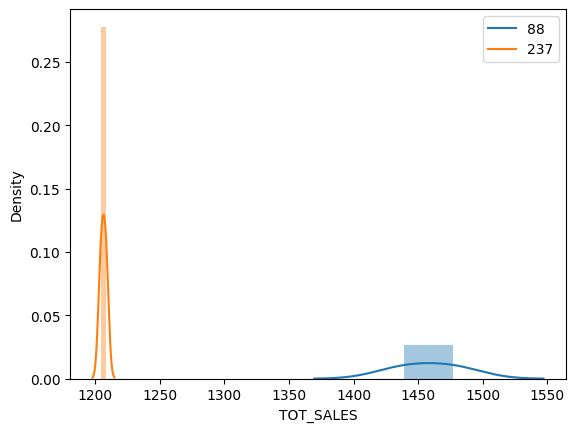

In [72]:
sns.distplot(trial.loc[88]['TOT_SALES'].tail(2))
sns.distplot(trial.loc[237]['TOT_SALES'].tail(2))
plt.legend(labels=['88','237'])
plt.show()

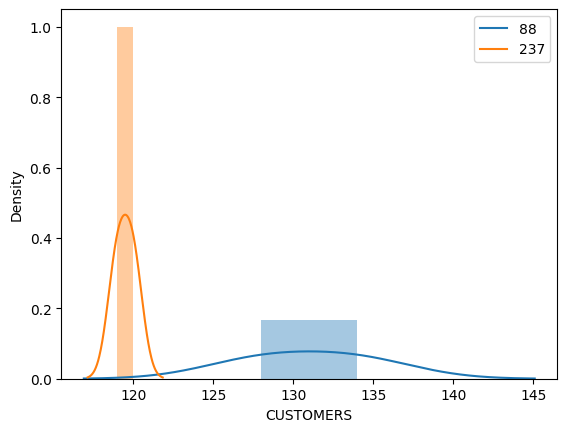

In [73]:
sns.distplot(trial.loc[88]['CUSTOMERS'].tail(2))
sns.distplot(trial.loc[237]['CUSTOMERS'].tail(2))
plt.legend(labels=['88','237'])
plt.show()

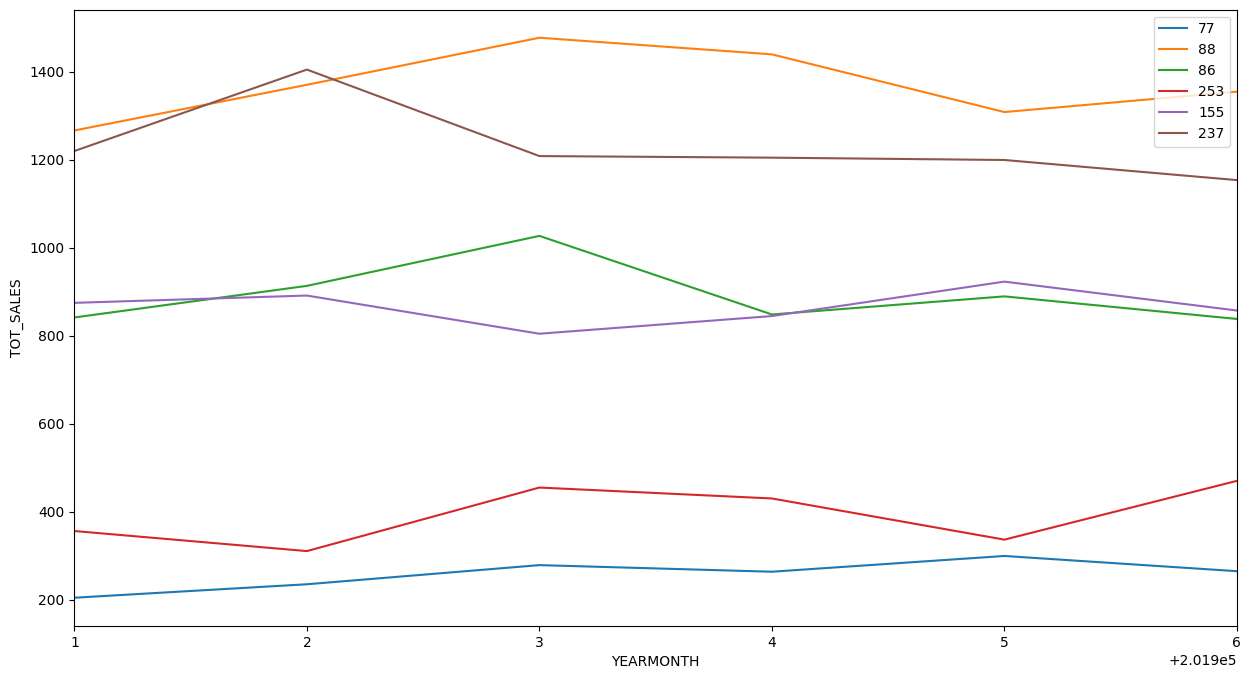

In [74]:
fig, ax = plt.subplots(figsize=(15, 8))
x=['77','88','86','253','155','237']
for i in  x:
    sns.lineplot(data=full.loc[int(i)],y='TOT_SALES',x=full.index.get_level_values(1).unique(),label=i)


ax.set_xlim(201901,201906)
plt.show()

results for stores 77 and 88 during the trial period show a significant difference